## Interpretable Student Placement Prediction

In [1]:
# 1. DATA PREPROCESSING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Loading data

In [2]:
df = pd.read_csv ("C:/Users/chipu/Documents/Project/placement.csv")

## Data Inspection


In [3]:
# Initial inspection
print("Initial Shape:", df.shape)
print(df.head())

Initial Shape: (100, 4)
   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


## Handling missing values

In [4]:
print("MISSING VALUES COUNT:")
print(df.isnull().sum())

MISSING VALUES COUNT:
Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64


In [5]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [6]:
import random

# --- Handle Numerical Columns: Mean Imputation ---
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

# --- Handle Categorical Columns: Random Sampling from Existing Values ---
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        existing_values = df[col].dropna().tolist()
        df[col] = df[col].apply(
            lambda x: random.choice(existing_values) if pd.isnull(x) else x
        )

In [7]:
# Check if any missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64


### Feature Engineering

In [30]:
# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [32]:
## Saving the encoded categories

import pickle

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)


In [9]:
# Separate features and target
X = df.drop("placement", axis=1)  # assume 'Placement' is the target
y = df["placement"]

In [10]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
# Feature importance using Mutual Information (optional)
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train)
for feature, score in zip(df.columns[:-1], mi_scores):
    print(f"{feature}: {score:.4f}")


Unnamed: 0: 0.0000
cgpa: 0.5885
iq: 0.0000


## Model Buildig

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [15]:
# Training the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
SVM trained successfully.
Random Forest trained successfully.
Naive Bayes trained successfully.
Gradient Boosting trained successfully.


In [16]:
y_pred = model.predict(X_test)

## Evaluation Metrics

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(X_test)

In [22]:
print(f"\n{name} Results:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")


Gradient Boosting Results:
Accuracy:  0.8500
Precision: 0.8889
Recall:    0.8000
F1 Score:  0.8421


### Explainability usig SHAP

In [19]:
## Compare if number of features match in X_test and SHAP

print("SHAP values shape:", shap_values[1].shape)
print("X_test shape:", X_test.shape)

NameError: name 'shap_values' is not defined

In [ ]:
# Ensure this was used for training
best_model.fit(X_train, y_train)  # X_train is a DataFrame, not np.array

model = RandomForestClassifier()
model.fit(X_train, y_train)  # X_train must be a DataFrame



RandomForestClassifier()

In [ ]:
print(type(X_train))          # checking whats being used (dataframe or Numpy array)


# feature_names = original_dataframe.columns.tolist()

## Convert your NumPy array to a DataFrame with feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)




<class 'numpy.ndarray'>


In [ ]:
## Checking SHAP features
print("Features used in SHAP (from model):")
print(best_model.feature_names_in_)
print("Number of features used by model:", len(best_model.feature_names_in_))

Features used in SHAP (from model):


AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

In [ ]:
model_features = list(best_model.feature_names_in_)
xtest_features = list(X_test.columns)

# Show mismatches
print("\nFeatures in model but not in X_test:")
print(set(model_features) - set(xtest_features))

print("\nFeatures in X_test but not in model:")
print(set(xtest_features) - set(model_features))


AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names_in_'

In [25]:
import shap

# # Use the best model (e.g., Random Forest) for SHAP
best_model = models["Random Forest"]

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot
feature_names = X.columns  # Use original column names from training
shap.summary_plot(shap_values[1], X_test, feature_names=feature_names)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

### SHAP Summary Plot (Feature Importance)


In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you've already computed shap_values and have X_test_df
shap.summary_plot(shap_values[1], X_test_df)

# Optional: Save it
plt.savefig("shap_summary_plot.png")


NameError: name 'X_test_df' is not defined

### SHAP Force Plot (Single Prediction Explanation)

In [ ]:
shap.initjs()  # for JS support in Jupyter Notebook

# For a single instance (e.g., first in test set)
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_df.iloc[0])


NameError: name 'X_test_df' is not defined

### Surrogate model for Interpretability

In [26]:
# 6. SURROGATE MODEL
# Train a decision tree on the predictions of the black-box model
from sklearn.tree import DecisionTreeClassifier, export_text

# Get predictions from black-box (Random Forest)
blackbox_predictions = best_model.predict(X_train)

# Train surrogate model
surrogate = DecisionTreeClassifier(max_depth=3)
surrogate.fit(X_train, blackbox_predictions)

# Print rules
print("\nSurrogate Decision Tree Rules:")
print(export_text(surrogate, feature_names=list(X.columns)))



Surrogate Decision Tree Rules:
|--- cgpa <= 0.14
|   |--- cgpa <= -0.39
|   |   |--- class: 0
|   |--- cgpa >  -0.39
|   |   |--- Unnamed: 0 <= 1.21
|   |   |   |--- class: 0
|   |   |--- Unnamed: 0 >  1.21
|   |   |   |--- class: 1
|--- cgpa >  0.14
|   |--- class: 1



###  Surrogate Decision Tree Visualization

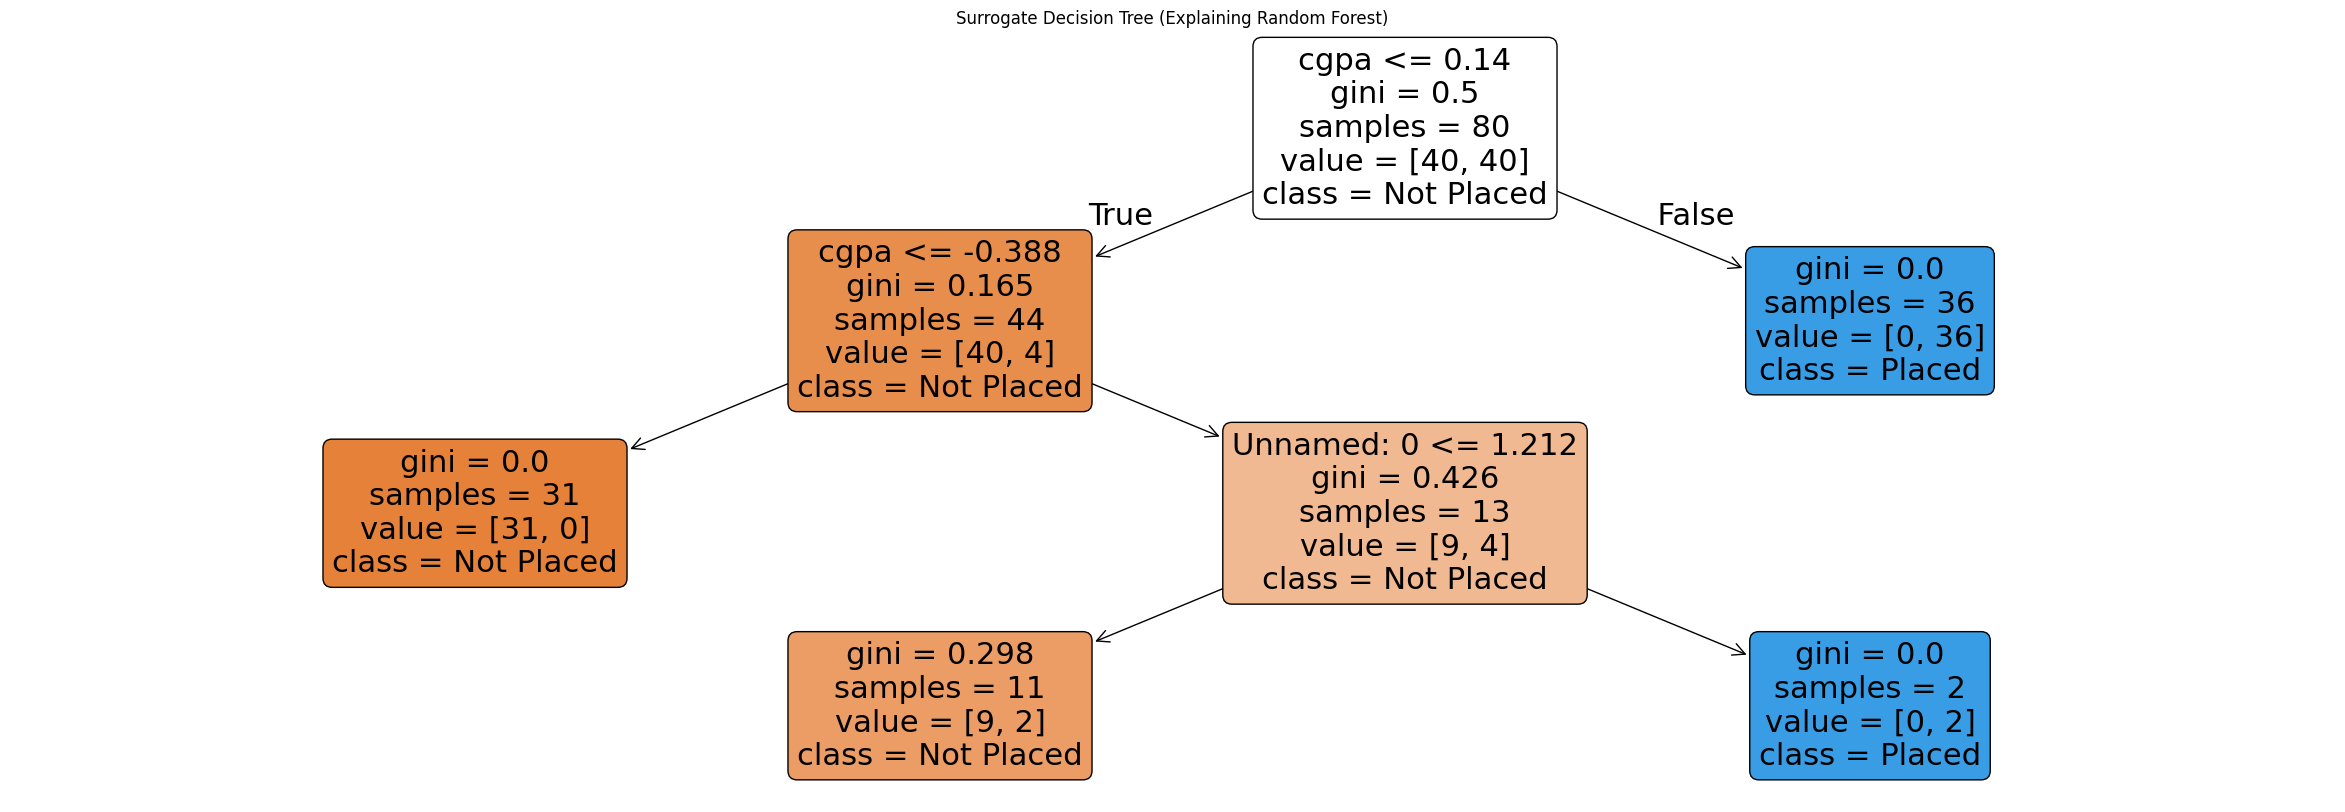

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(30,10))  # You can adjust the size
plot_tree(
    surrogate, 
    feature_names=feature_names, 
    class_names=["Not Placed", "Placed"], 
    filled=True,
    rounded=True
)
plt.title("Surrogate Decision Tree (Explaining Random Forest)")
plt.show()


### R-SCORE reliability check

In [28]:
# 7. R-SCORE RELIABILITY (SIMULATED EXAMPLE)
# We'll test explanation consistency by checking stability of SHAP top features

top_features_runs = []

for i in range(3):  # Run SHAP multiple times to check consistency
    explainer = shap.TreeExplainer(best_model)
    shap_vals = explainer.shap_values(X_test)
    top = np.argsort(np.abs(shap_vals[1]).mean(axis=0))[-5:]
    top_features_runs.append([X.columns[i] for i in top])

# Show results of top features per run
for i, run in enumerate(top_features_runs):
    print(f"Top features run {i+1}: {run}")


Top features run 1: ['Unnamed: 0', 'cgpa']
Top features run 2: ['Unnamed: 0', 'cgpa']
Top features run 3: ['Unnamed: 0', 'cgpa']


In [29]:
import joblib

# Save the best model (Random Forest)
joblib.dump(models["Random Forest"], "random_forest_model.pkl")

print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl
